In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', 500)

In [25]:
df=pd.read_csv("Algerian_forest_fires_dataset.csv")

In [26]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [27]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
246,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


In [28]:
#3 Data Checks and cleaning

In [39]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [40]:
df.drop([122,123, 168],axis=0, inplace=True) 
df = df.reset_index()
df.head()

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [41]:
df[df.isnull().any(axis=1)]

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [42]:
df.columns

Index(['index', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [43]:
[x for x in df.columns if ' ' in x]

[]

In [44]:
df.columns = df.columns.str.strip()
df.columns

Index(['index', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [45]:
import re
def Remove_Extra_Space(x):
    return (re.sub(' +', ' ', x).strip())

In [46]:
df['Classes'] = df['Classes'].apply(Remove_Extra_Space)

In [47]:
df.drop(['index'],axis=1, inplace=True)

In [48]:
df['date'] = pd.to_datetime(df[['day', 'month', 'year']])

In [49]:
df.drop(['day', 'month', 'year'], axis = 1, inplace = True)

In [50]:

def date_imputation(x):
    if (x >= pd.to_datetime('2012-07-01')) and (x <= pd.to_datetime('2012-09-01')):
        return 1
    else:
        return 0
df['date'] = df['date'].apply(date_imputation)


In [51]:
df['date'].value_counts()

1    124
0    117
Name: date, dtype: int64

In [52]:
df.loc[:122, 'Region'] = 0
df.loc[122:, 'Region'] = 1

In [53]:
df.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
date           0
Region         0
dtype: int64

In [54]:
df['Classes'] = df['Classes'].map({'not fire' : 0, 'fire': 1})

In [55]:
df.duplicated().sum()

0

In [56]:
df.dtypes

Temperature     object
RH              object
Ws              object
Rain            object
FFMC            object
DMC             object
DC              object
ISI             object
BUI             object
FWI             object
Classes          int64
date             int64
Region         float64
dtype: object

In [57]:
convert_data = {'Temperature' : 'float64', 'RH': 'float64', 'Ws': 'float64', 'DMC' : 'float64', 
                'DC' : 'float64', 'ISI': 'float64', 'BUI': 'float64', 'FWI':'float64', 
                'Rain' : 'float64', 'FFMC' : 'float64' , 'Classes':'object'}
df = df.astype(convert_data)

In [58]:
df.dtypes

Temperature    float64
RH             float64
Ws             float64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
date             int64
Region         float64
dtype: object

In [59]:
df.nunique()

Temperature     19
RH              62
Ws              18
Rain            39
FFMC           172
DMC            164
DC             196
ISI            106
BUI            172
FWI            125
Classes          2
date             2
Region           2
dtype: int64

In [60]:
df.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,date,Region
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,32.153527,61.925311,15.502075,0.766390,77.900415,14.704564,49.631535,4.759751,16.730705,7.060996,0.514523,0.493776
std,3.643098,14.827713,2.812360,2.010926,14.340216,12.412770,47.787110,4.162891,14.256775,7.458299,0.500829,0.501002
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000,0.000000
25%,30.000000,52.000000,14.000000,0.000000,72.300000,5.800000,14.200000,1.400000,6.000000,0.700000,0.000000,0.000000
50%,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,1.000000,0.000000
75%,35.000000,73.000000,17.000000,0.500000,88.300000,20.700000,71.000000,7.300000,22.900000,11.600000,1.000000,1.000000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000,1.000000


In [61]:
categorical_feature=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_feature

['Classes']

In [62]:
for feature in categorical_feature:
    print(df.groupby(feature)[feature].value_counts())

Classes  Classes
0        0          105
1        1          136
Name: Classes, dtype: int64


In [63]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='O']
print(numerical_features)

['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'date', 'Region']


In [64]:
#here the assumption to consider a feature discrete is that it should have less than 35 unique values otherwise it will be
# considered continuous feature
discrete_features=[feature for feature in numerical_features if len(df[feature].unique())<18]
discrete_features

['date', 'Region']

In [65]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_features]
print(continuous_features)

['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']


In [66]:
#4 Graphical Analysis

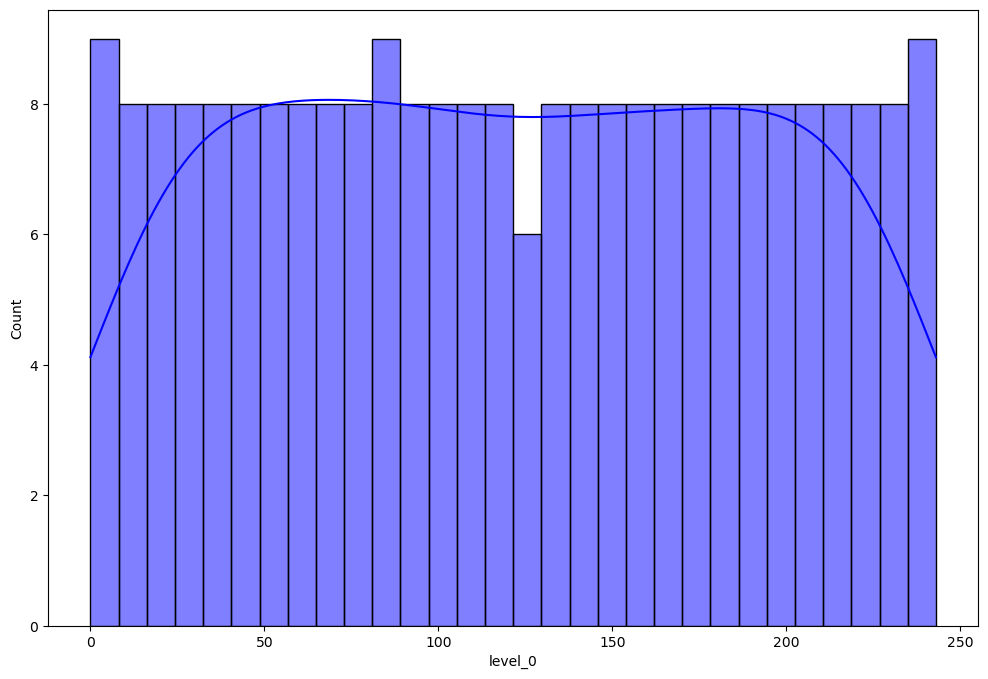

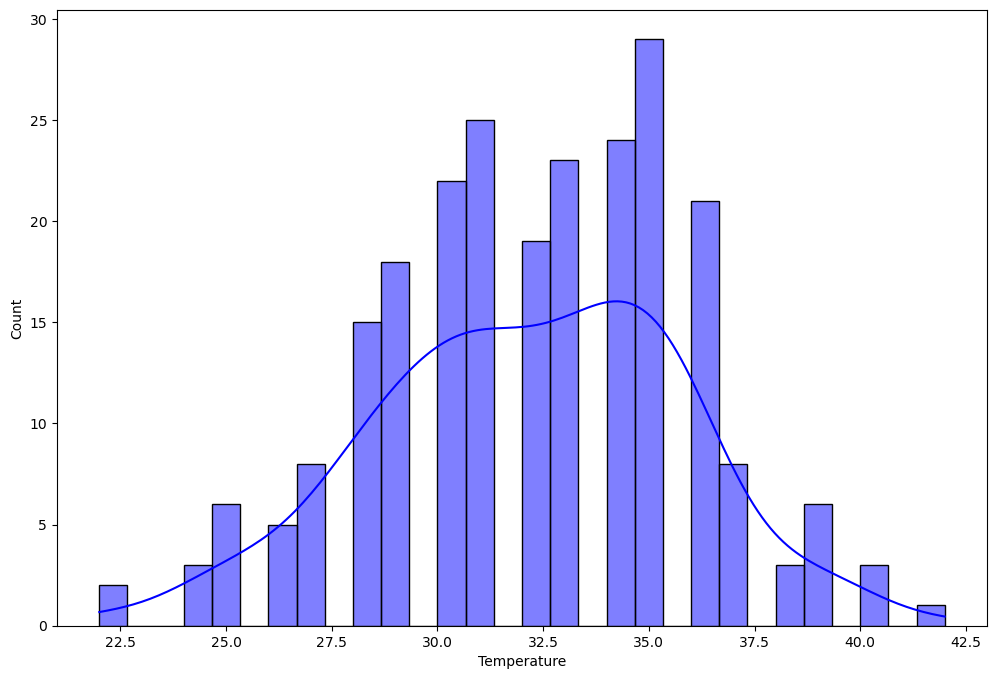

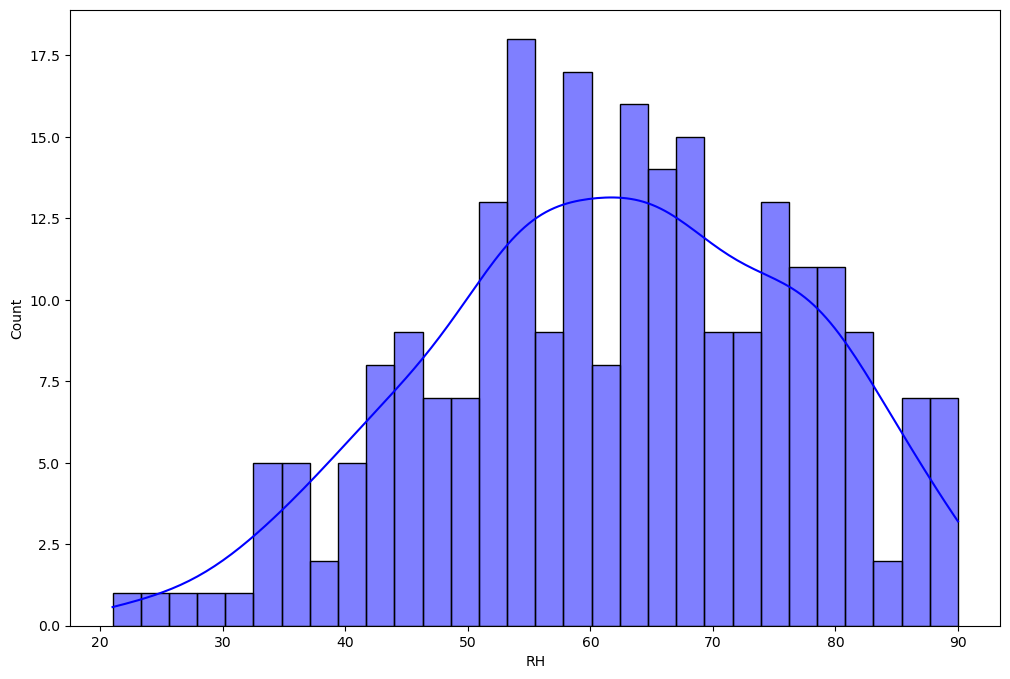

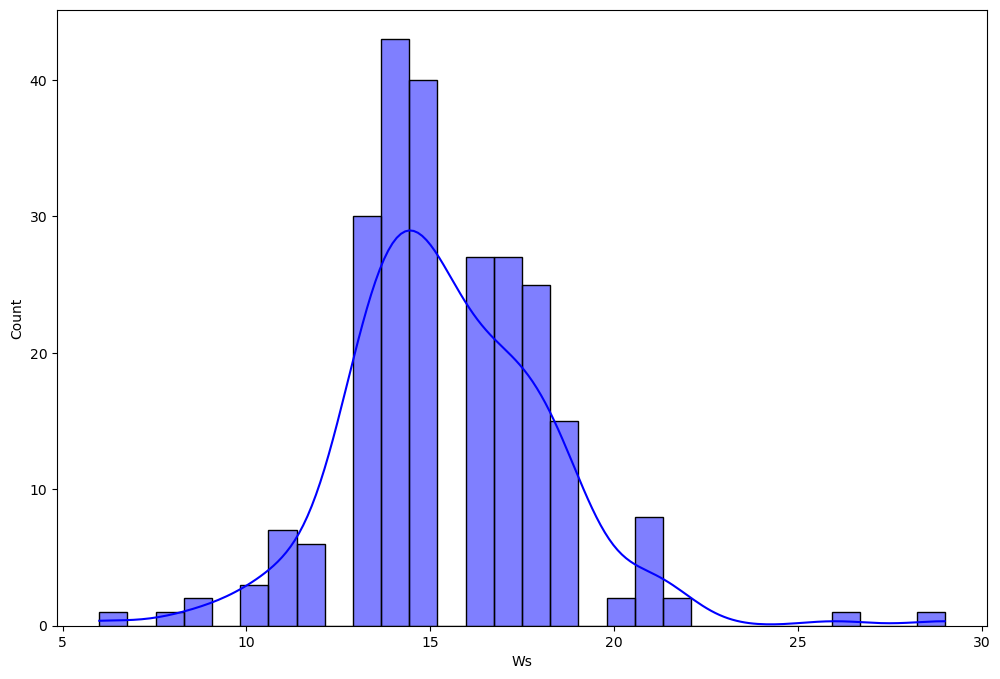

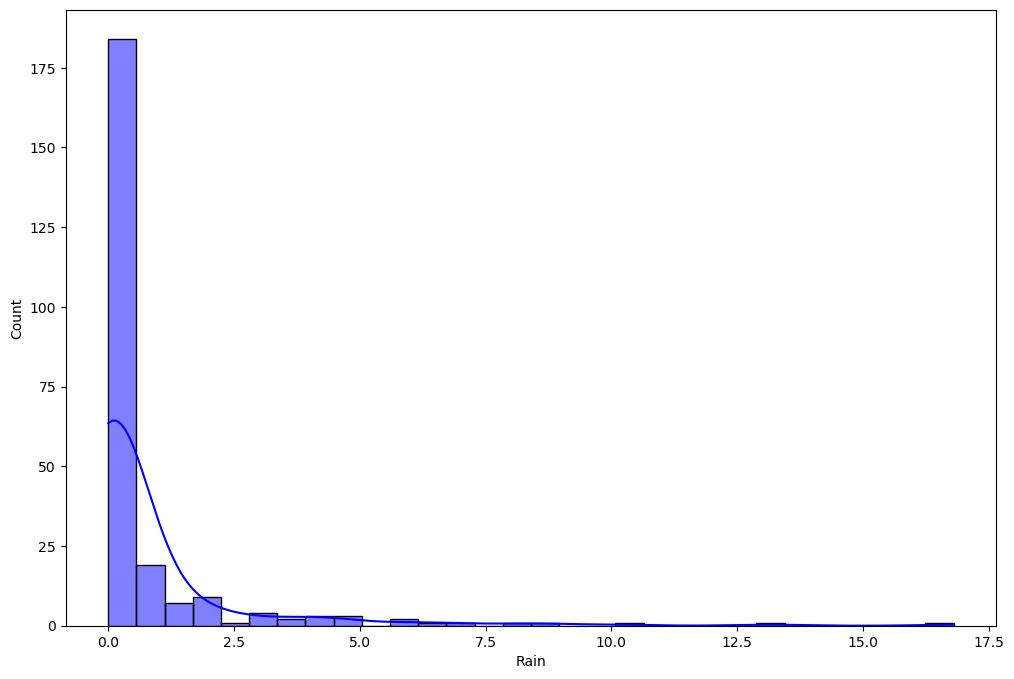

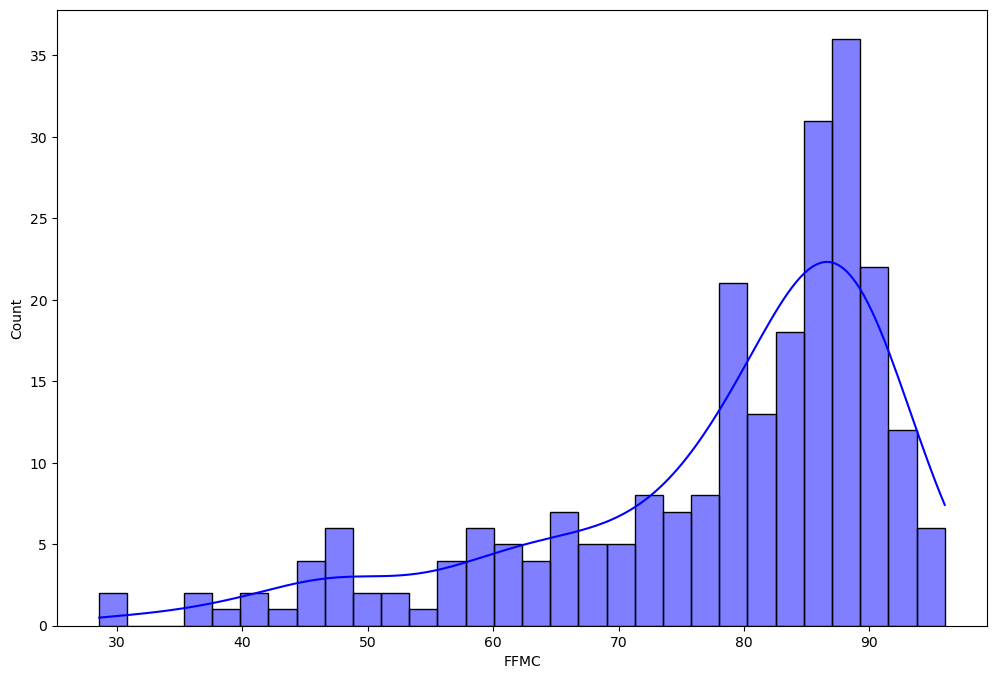

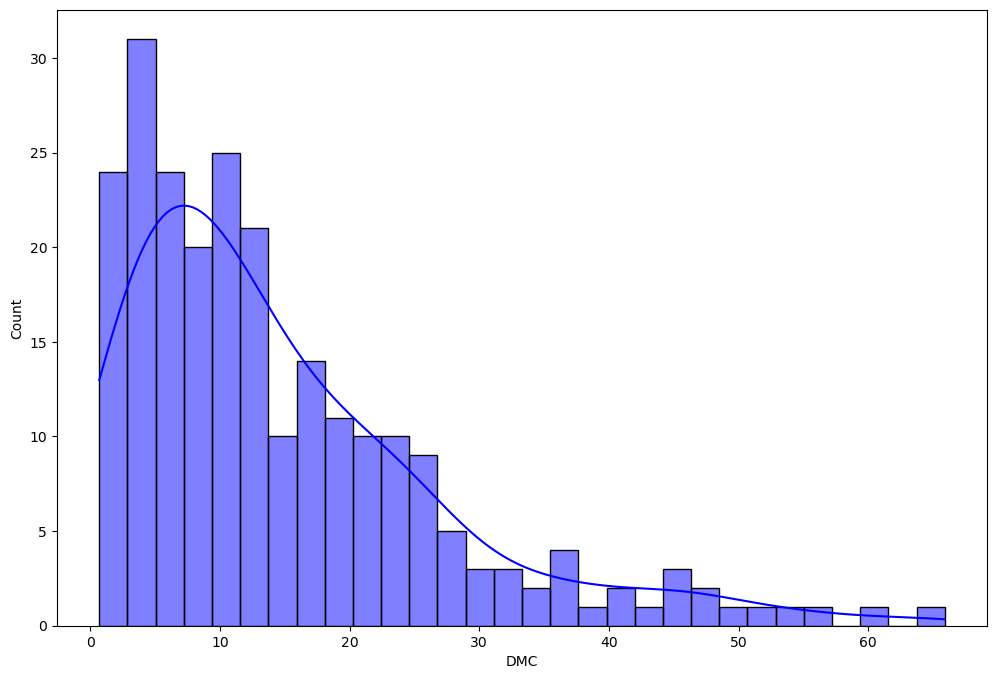

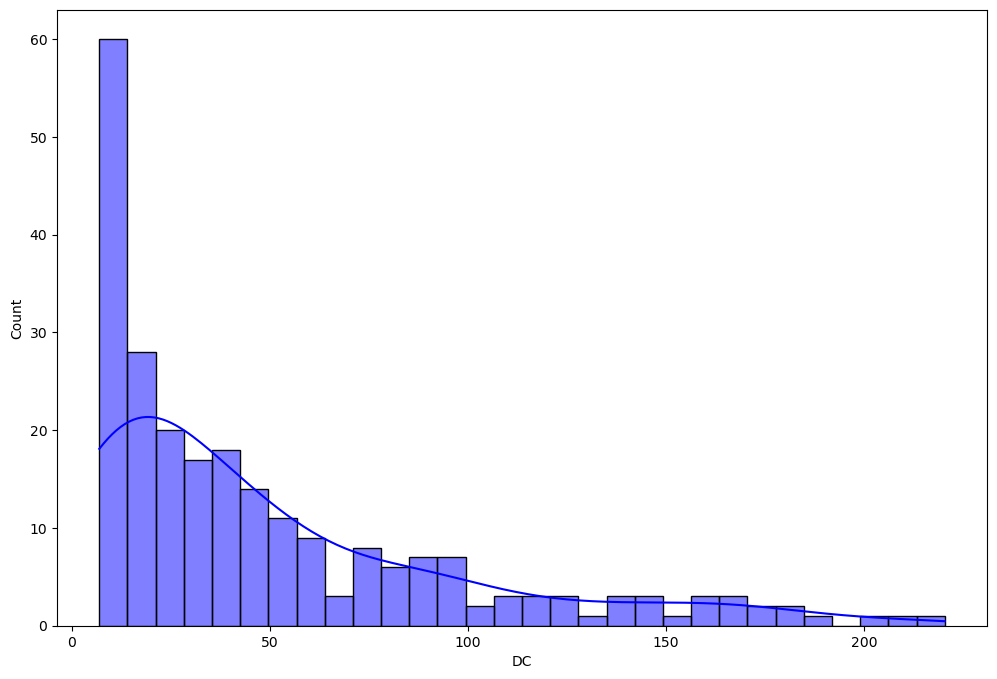

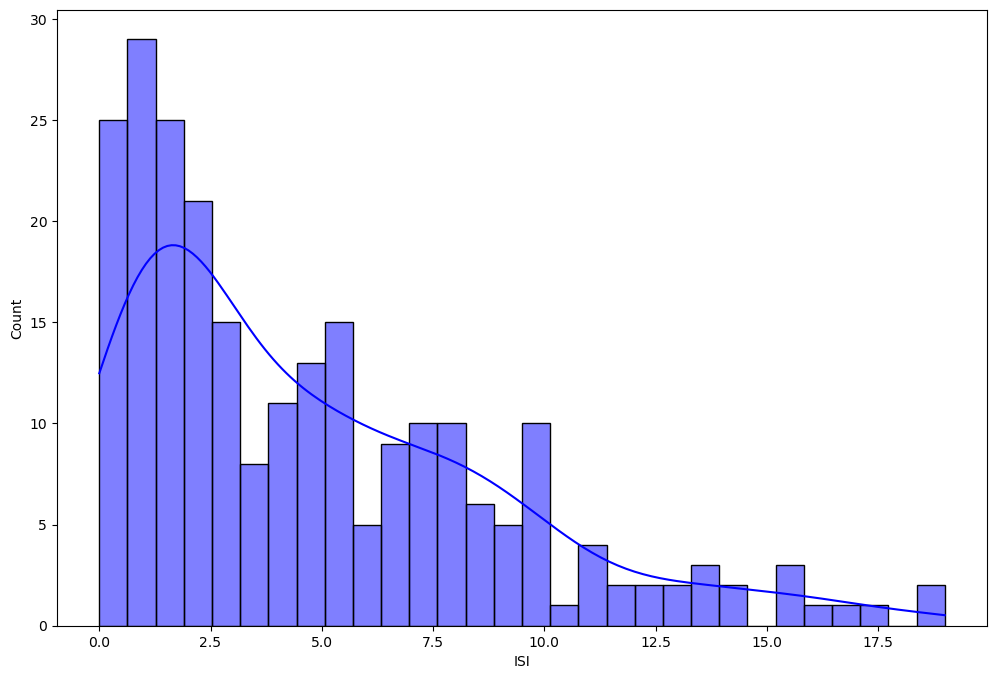

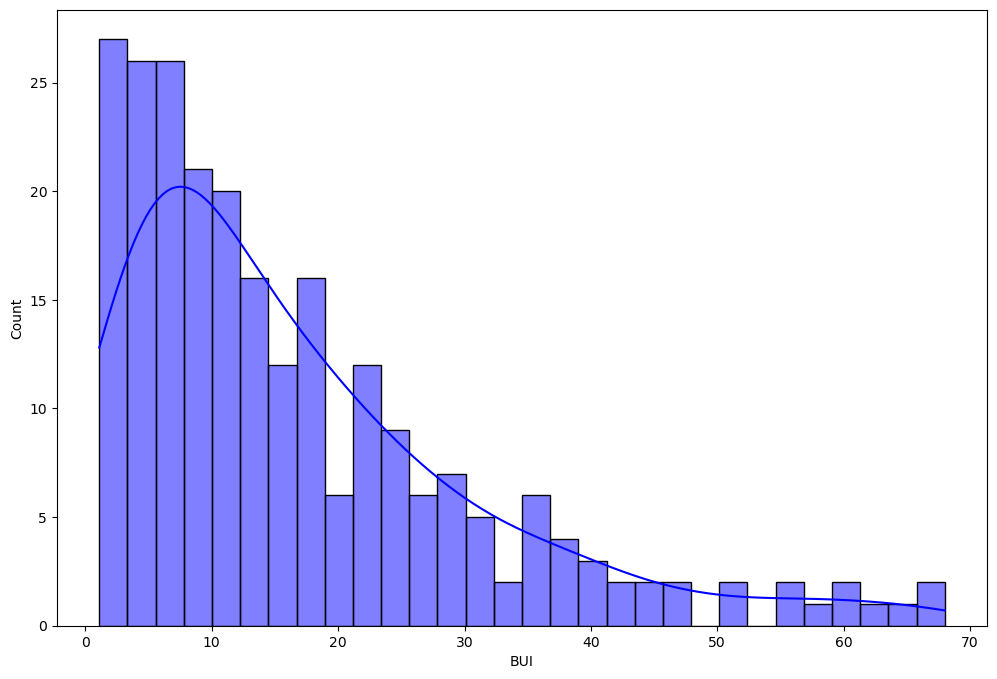

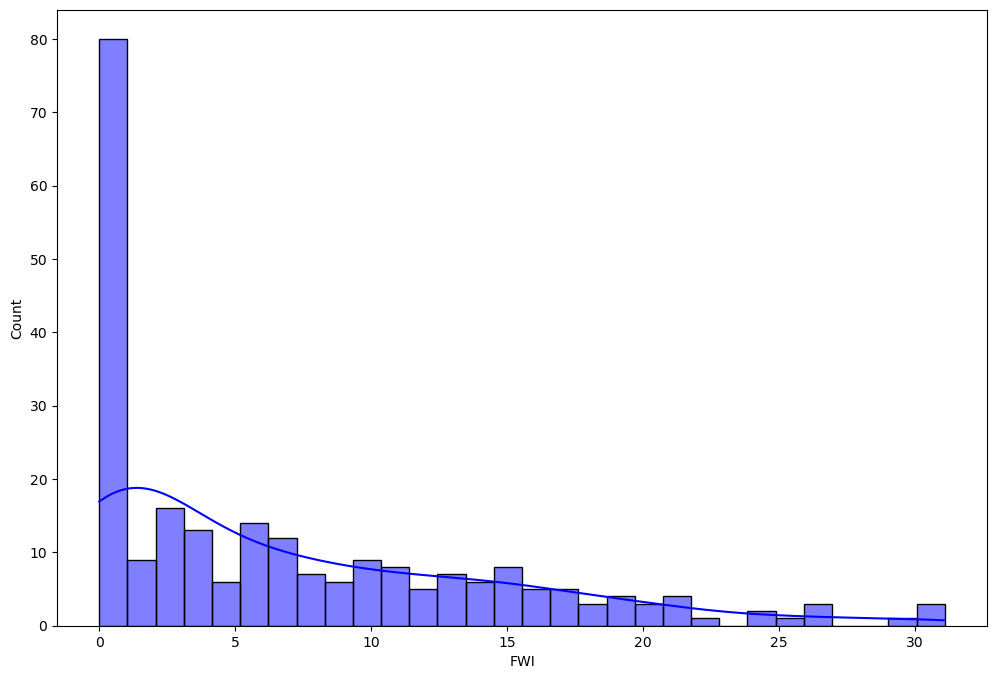

In [81]:
for feature in continuous_features:
    plt.figure(figsize=(12,8))
    sns.histplot(data=df, x=feature,kde=True, bins=30, color='blue') 
    plt.show();

In [67]:
#5 Outliers Handling

Text(0.5, 1.0, 'Before Removing Outliers')

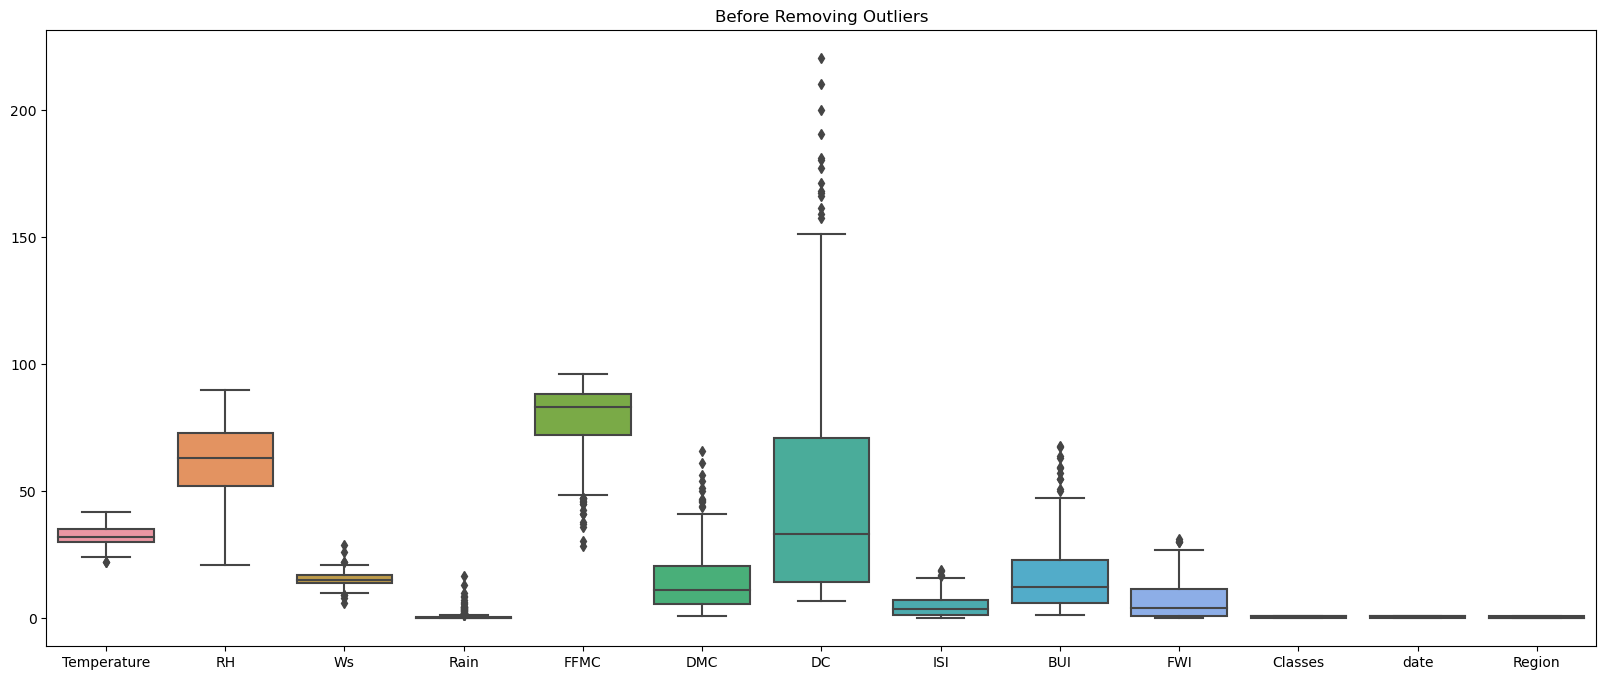

In [68]:
plt.figure(figsize=(20, 8))
sns.boxplot(data=df)
plt.title("Before Removing Outliers")

In [71]:
def find_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25) 
    lower_boundary = df[variable].quantile(0.25) - (IQR*distance) 
    upper_boundary = df[variable].quantile(0.75) + (IQR*distance) 
    return upper_boundary, lower_boundary

In [73]:
outliers_columns = ['Temperature', 'Ws','Rain','FFMC','DMC','ISI','BUI', 'FWI'] 
for i in outliers_columns:
  upper_boundary, lower_boundary = find_boundaries(df,i, 1.5)
  outliers = np.where(df[i] > upper_boundary, True, np.where(df[i]<lower_boundary, True, False))
  outliers_df = df.loc[outliers, i]
  df_trimed= df.loc[~outliers, i]
  df[i] = df_trimed

Text(0.5, 1.0, 'After Removing Outliers')

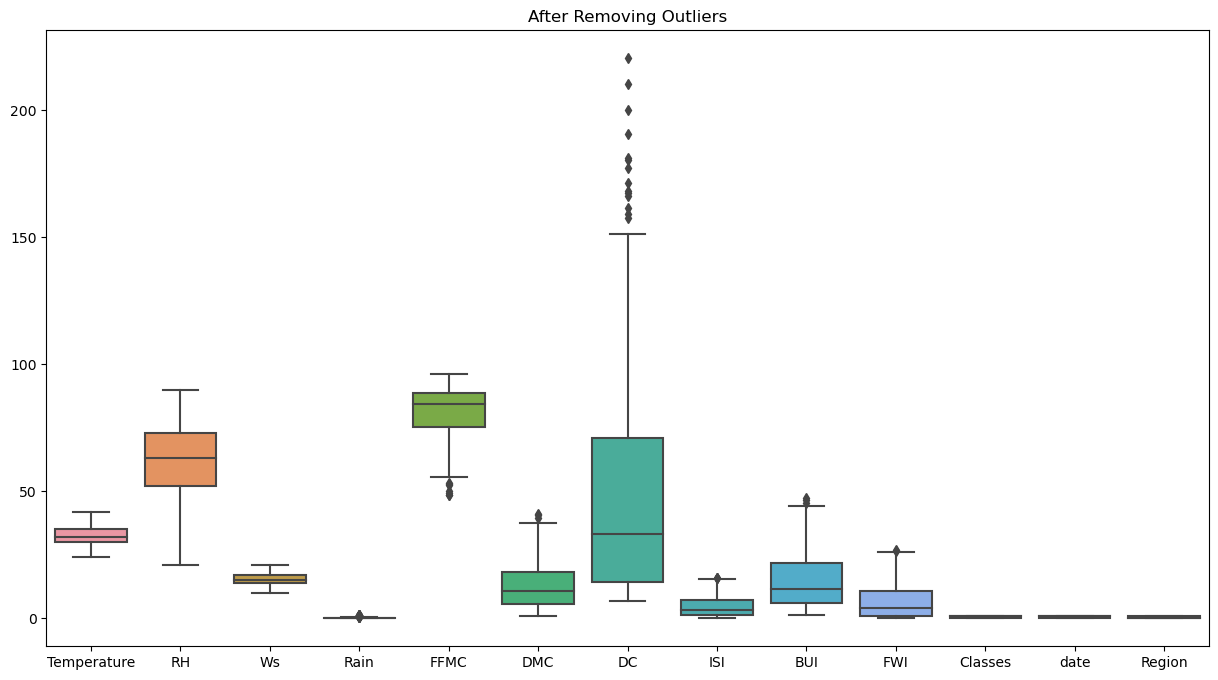

In [74]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df)
plt.title("After Removing Outliers")

Text(0.5, 1.0, 'Before Removing Outliers')

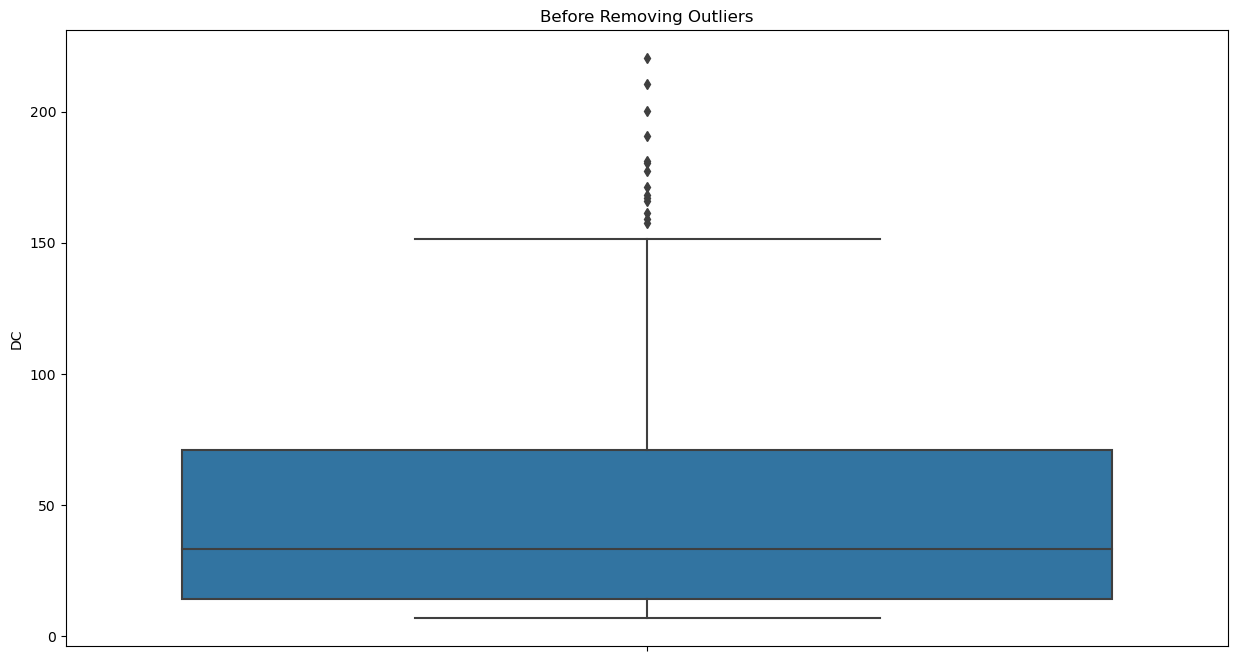

In [75]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, y= 'DC')
plt.title("Before Removing Outliers")

In [76]:
outliers = df[df['DC'] >=118]['DC']
df['DC'] = df[df['DC'] < 118]['DC']

Text(0.5, 1.0, 'After Removing Outliers')

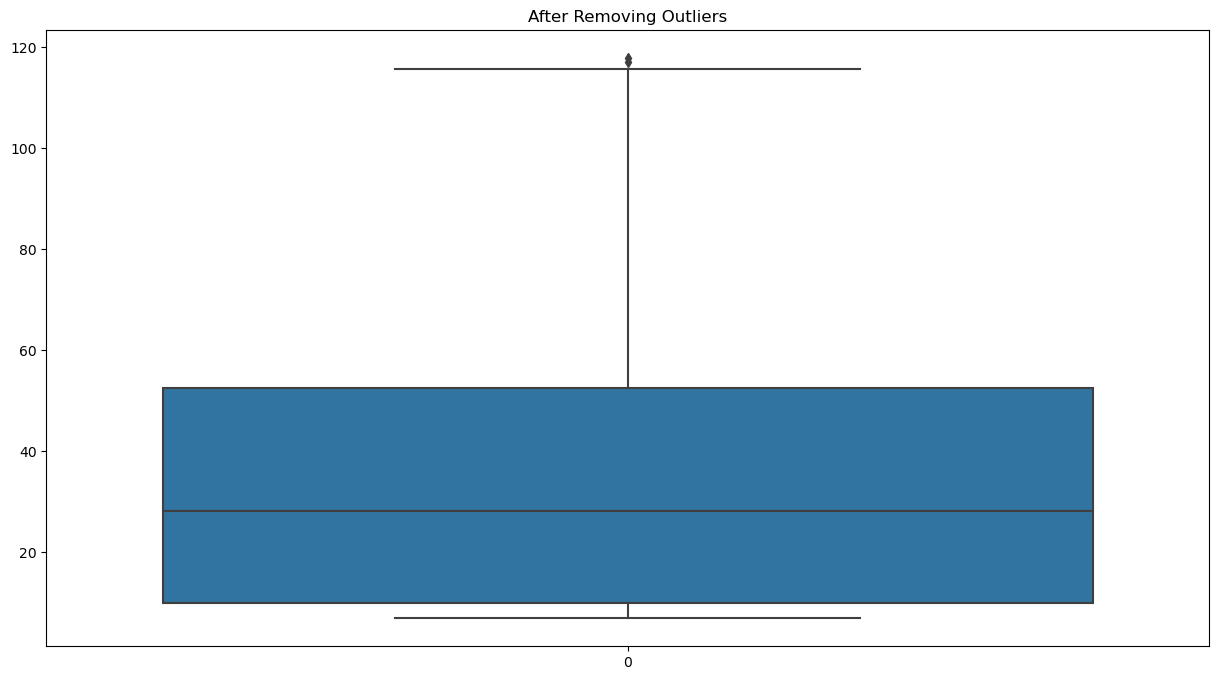

In [77]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df['DC'])
plt.title("After Removing Outliers")

In [78]:
df.isnull().sum()

Temperature     2
RH              0
Ws              8
Rain           35
FFMC           16
DMC            12
DC             25
ISI             4
BUI            11
FWI             4
Classes         0
date            0
Region          0
dtype: int64

In [79]:
df.fillna(df.median().round(1), inplace=True)

In [80]:
df.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
date           0
Region         0
dtype: int64

In [81]:
data = round(df.corr(),2)

<Axes: >

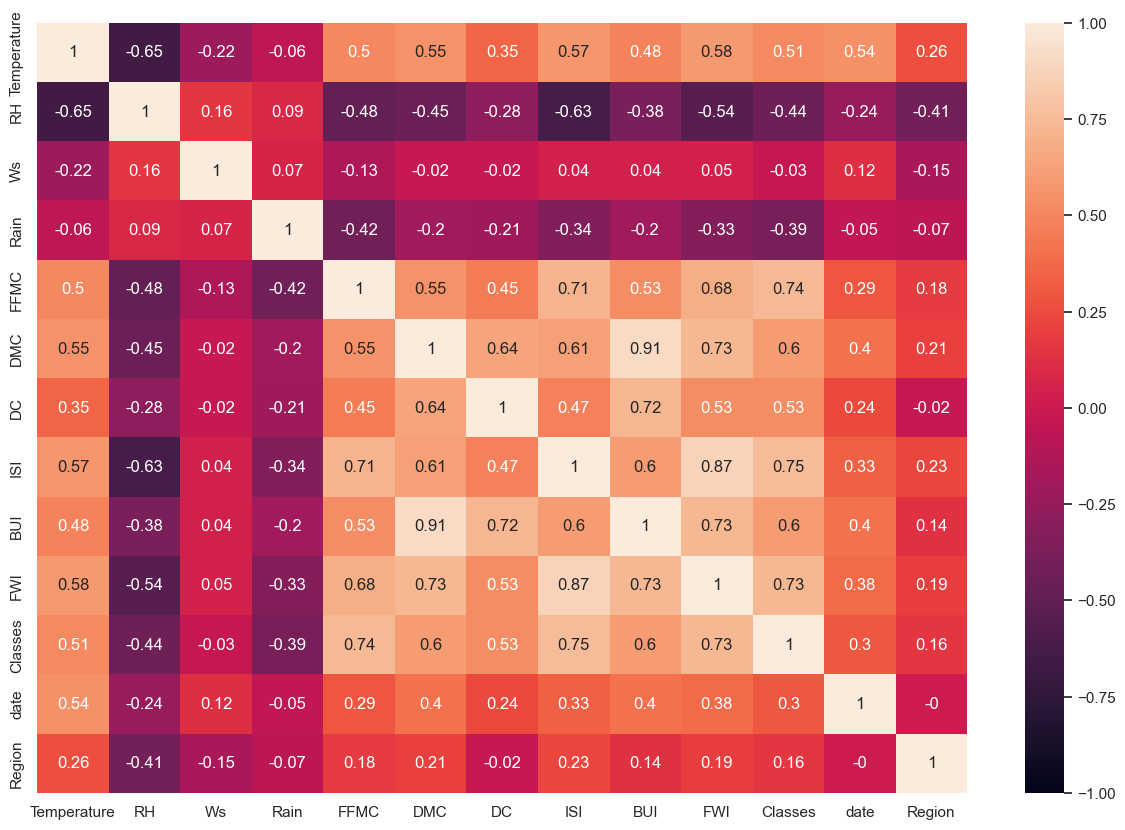

In [82]:
sns.set(rc={'figure.figsize':(15,10)}) 
sns.heatmap(data=data, annot=True, vmin=-1, vmax=1)

In [83]:
df.drop('BUI', axis=1, inplace=True)

<Axes: xlabel='date', ylabel='Temperature'>

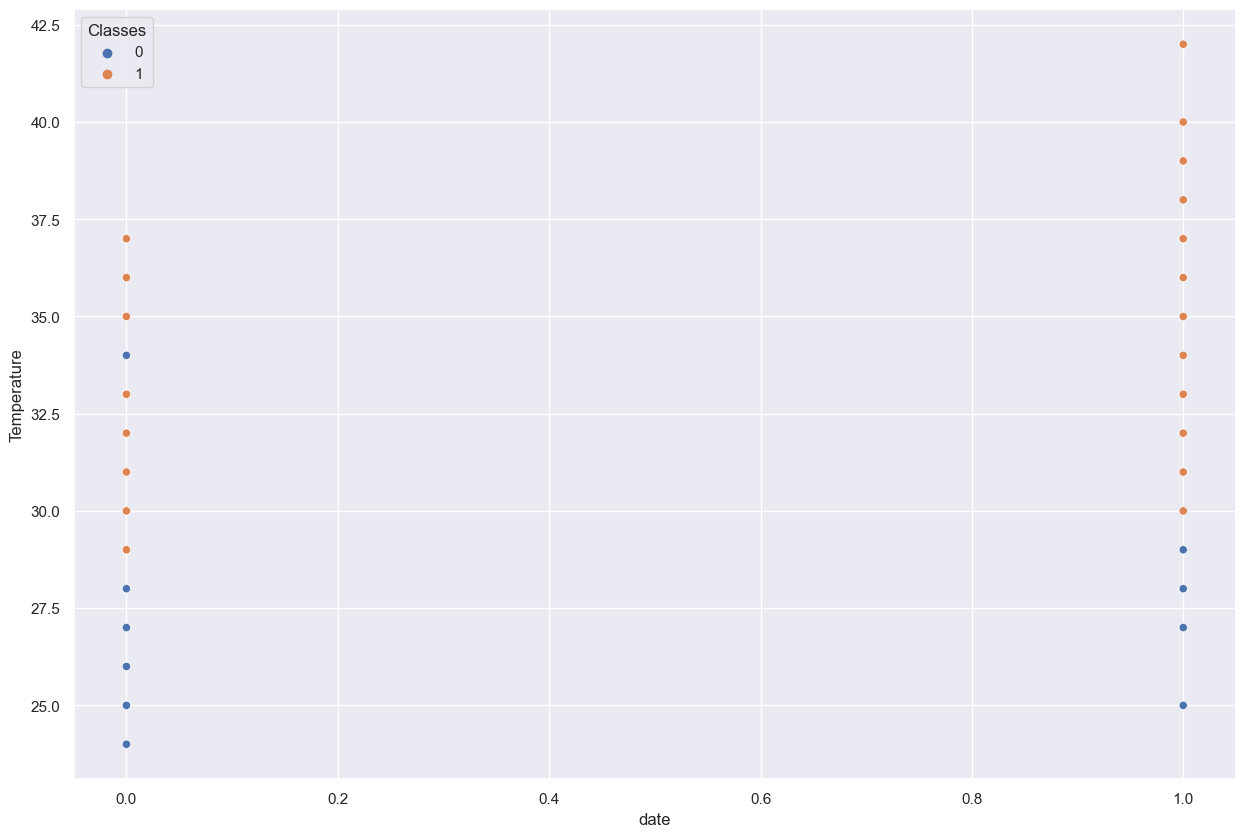

In [84]:
sns.scatterplot(data=df, x='date', y='Temperature', hue='Classes' )

In [85]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'FWI',
       'Classes', 'date', 'Region'],
      dtype='object')

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  241 non-null    float64
 1   RH           241 non-null    float64
 2   Ws           241 non-null    float64
 3   Rain         241 non-null    float64
 4   FFMC         241 non-null    float64
 5   DMC          241 non-null    float64
 6   DC           241 non-null    float64
 7   ISI          241 non-null    float64
 8   FWI          241 non-null    float64
 9   Classes      241 non-null    int64  
 10  date         241 non-null    int64  
 11  Region       241 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 22.7 KB


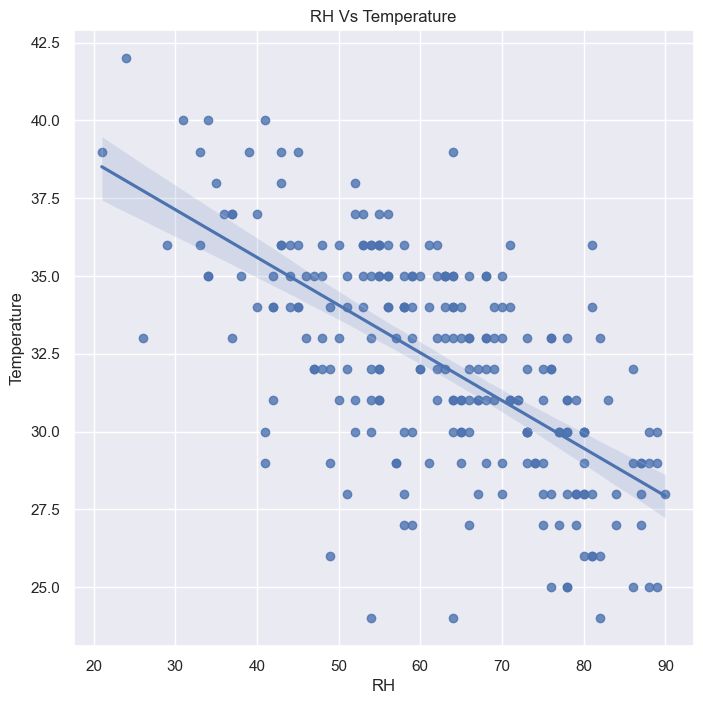

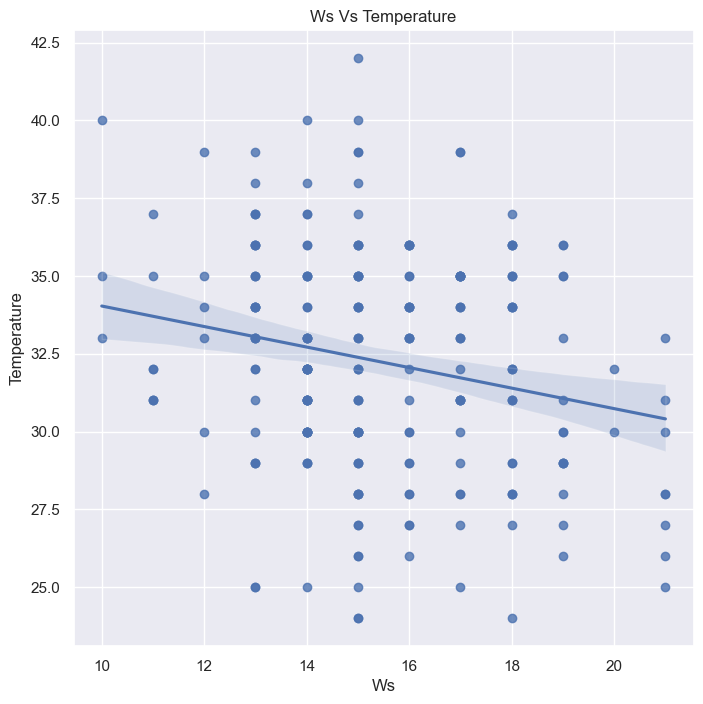

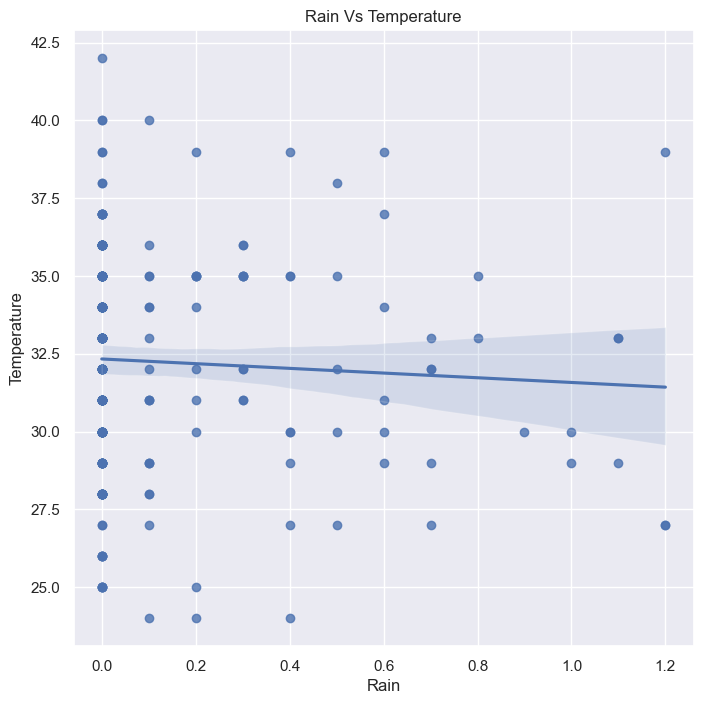

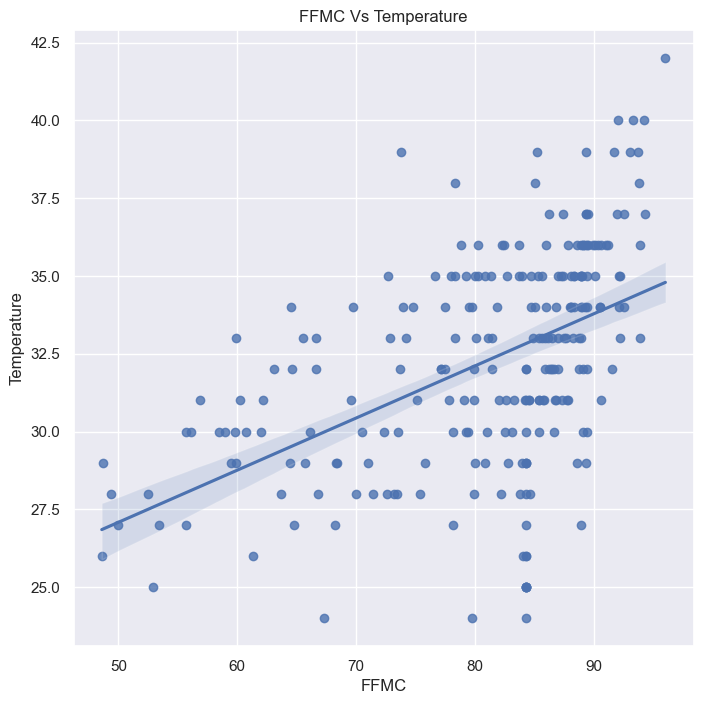

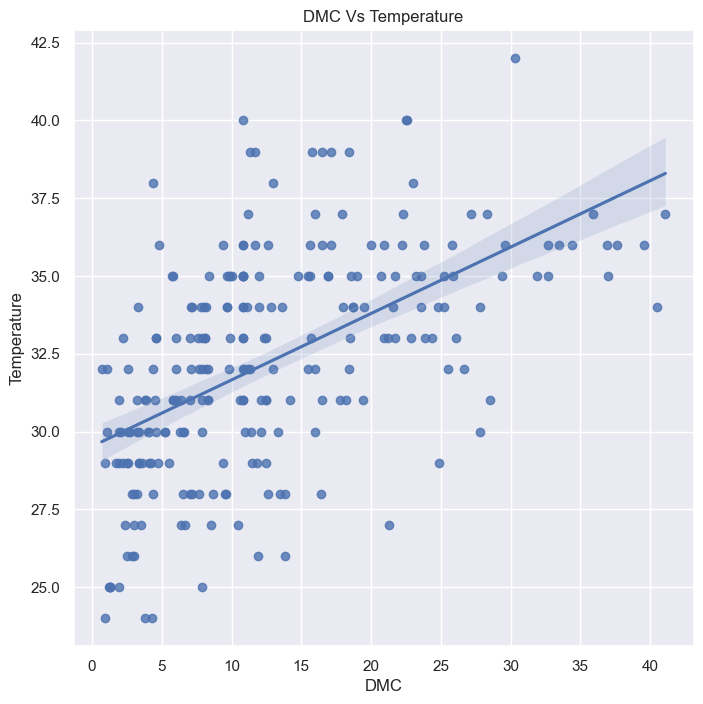

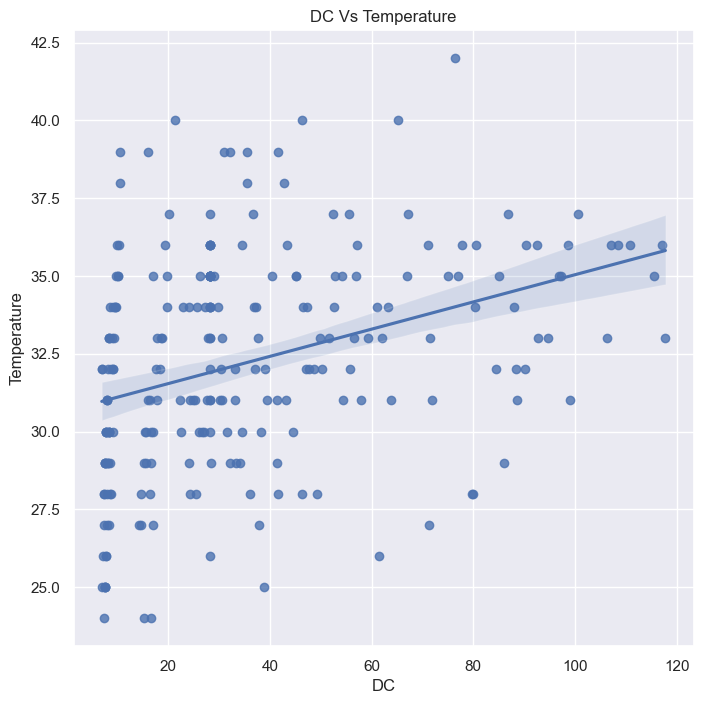

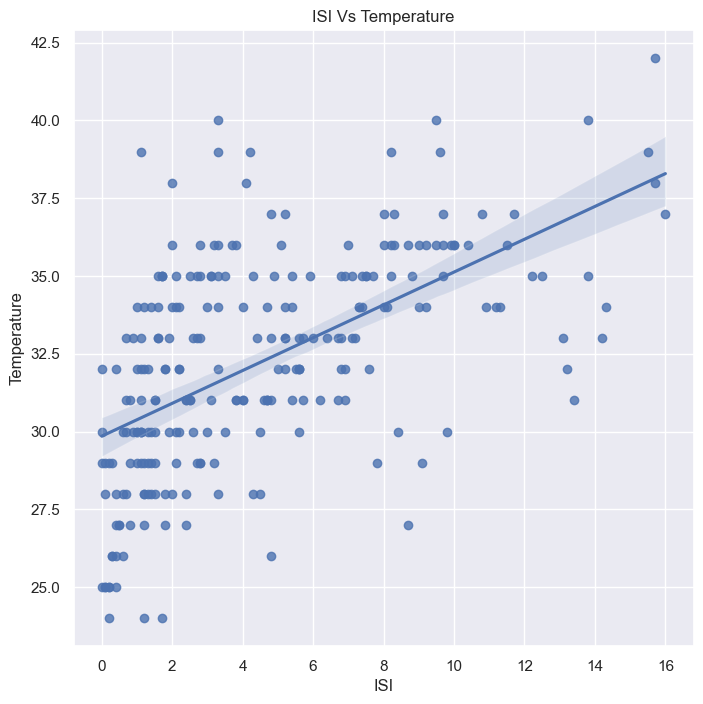

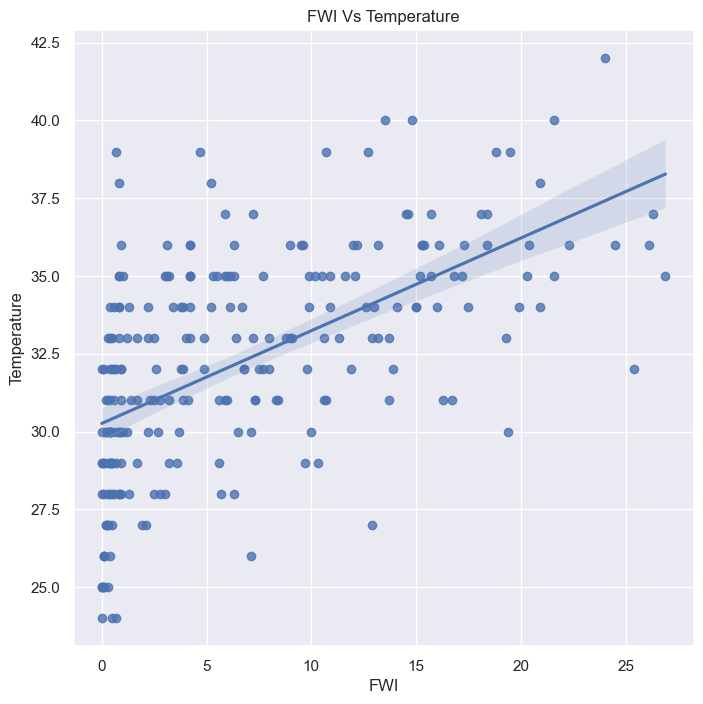

In [89]:
### shaded region is basically with respect to ridge and lasso (lambda)
for feature in [feature for feature in df.columns if feature not in ['Temperature', 'date', 'Region', 'Classes']]:
    sns.set(rc={'figure.figsize':(8,8)})
    sns.regplot(x=df[feature], y=df['Temperature'])
    plt.xlabel(feature)
    plt.ylabel("Temperature")
    plt.title("{} Vs Temperature".format(feature)) 
    plt.show();

In [90]:
### X independent features and y dependent feature
X= df[['RH', 'Ws', 'Rain','FFMC', 'DMC', 'ISI','DC',
       'FWI', 'Classes', 'Region', 'date']]
y=df[['Temperature']]

In [91]:
X

,RH,Ws,Rain,FFMC,DMC,ISI,DC,FWI,Classes,Region,date
0,57.0,18.0,0.0,65.7,3.4,1.3,7.6,0.5,0,0.0,0
1,61.0,13.0,0.0,64.4,4.1,1.0,7.6,0.4,0,0.0,0
2,82.0,15.0,0.0,84.3,2.5,0.3,7.1,0.1,0,0.0,0
3,89.0,13.0,0.0,84.3,1.3,0.0,6.9,0.0,0,0.0,0
4,77.0,16.0,0.0,64.8,3.0,1.2,14.2,0.5,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
236,65.0,14.0,0.0,85.4,16.0,4.5,44.5,6.5,1,1.0,0
237,87.0,15.0,0.0,84.3,6.5,0.1,8.0,0.0,0,1.0,0
238,87.0,15.0,0.5,84.3,3.5,0.4,7.9,0.2,0,1.0,0
239,54.0,18.0,0.1,79.7,4.3,1.7,15.2,0.7,0,1.0,0


In [92]:
### random state train test split will be same with all people using random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=42)

In [93]:
### creating a StandardScalar object
scaler=StandardScaler()
scaler

StandardScaler()

In [94]:
X_train=scaler.fit_transform(X_train)

In [95]:
## here using only transform to avoid data leakage
### (training mean and training std will be used for standardisation of test when we use transform on test data) 
X_test=scaler.transform(X_test)

In [ ]:
#8 Linear Regression Model

In [96]:
## creating linear regression model
linear_reg=LinearRegression()
linear_reg

LinearRegression()

In [97]:
pd.DataFrame(X_train).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [98]:
linear_reg.fit(X_train, y_train)

LinearRegression()

In [99]:
### Printing co-efficients and intercept of best fit hyperplane
print("1. Co-efficients of independent features is {}".format(linear_reg.coef_)) 
print("2. Intercept of best fit hyper plane is {}".format(linear_reg.intercept_))

1. Co-efficients of independent features is [[-1.35519289e+00 -8.60057863e-01  4.09459956e-01 -1.79493473e-01
   4.44272597e-01  3.58292922e-01 -5.31085375e-02  3.34861632e-01
   5.26671712e-01 -1.35199232e-03  1.23891769e+00]]
2. Intercept of best fit hyper plane is [32.1552795]


In [100]:
linear_reg_pred=linear_reg.predict(X_test)

In [101]:
residual_linear_reg=y_test-linear_reg_pred
residual_linear_reg = pd.DataFrame(residual_linear_reg)

In [102]:
#8.1 Validation of Linear Regression assumptions
#1. Linear Relationship

Text(0, 0.5, 'Predicted data')

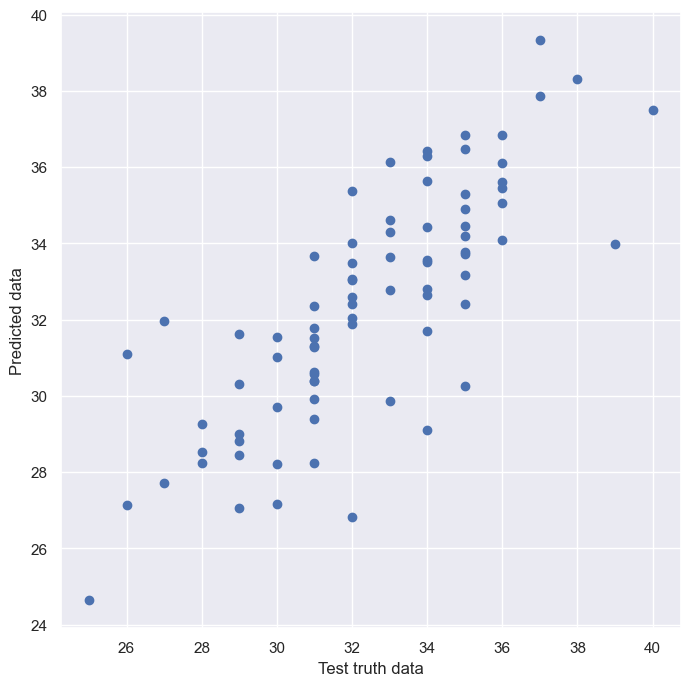

In [104]:
plt.scatter(x=y_test,y=linear_reg_pred)
plt.xlabel("Test truth data")
plt.ylabel("Predicted data")

In [105]:
#2. Residual should be normally distributed

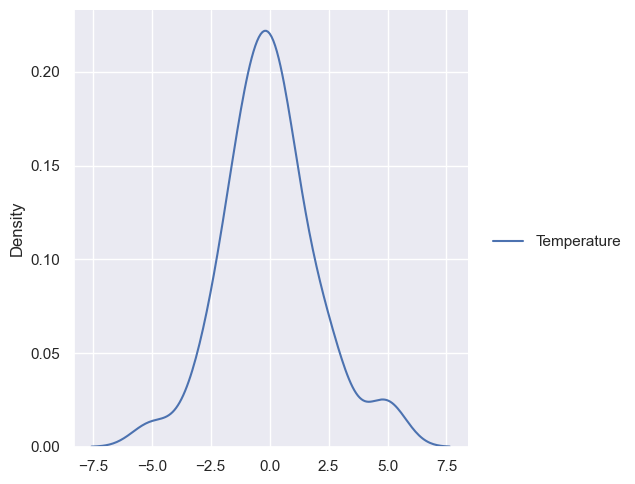

In [106]:
sns.displot(data=residual_linear_reg, kind='kde')

In [107]:
#3. Residual and Predicted values should follow uniform distribution

Text(0, 0.5, 'Residuals')

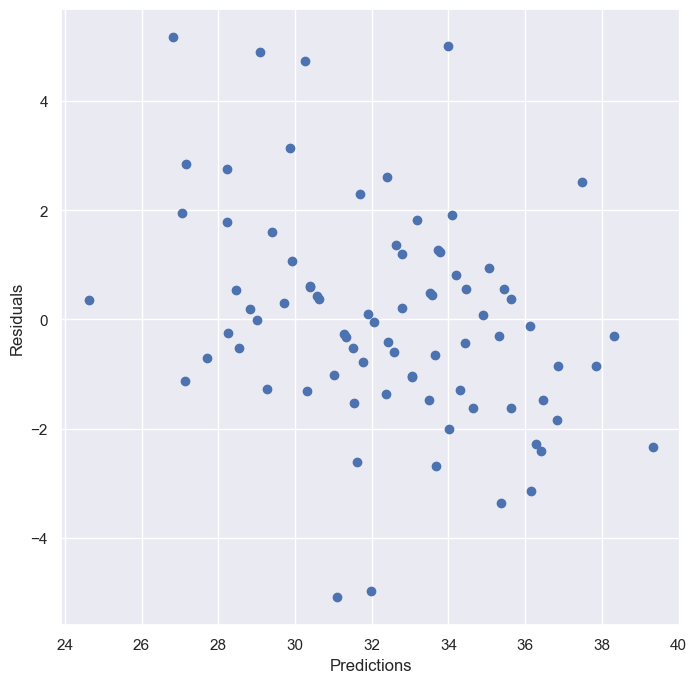

In [108]:
plt.scatter(x=linear_reg_pred, y=residual_linear_reg)
plt.xlabel('Predictions')
plt.ylabel('Residuals')

In [110]:
#8.2 Cost Function Values

In [112]:
print(f"MSE : {round(mean_squared_error(y_test, linear_reg_pred),2)}\nMAE :{round(mean_absolute_error(y_test, linear_reg_pred),2)}\nRMSE : {round(np.sqrt(mean_squared_error(y_test, linear_reg_pred)),2)}")

MSE : 3.86
MAE :1.46
RMSE : 1.96


In [ ]:
#8.3 Performance Metrics

In [113]:
linear_reg_r2_score=r2_score(y_test, linear_reg_pred)
linear_reg_adj_r2_score=1-((1-linear_reg_r2_score)*(len(y_test)-1)/
                           (len(y_test)-X_test.shape[1]-1))
print(f"R-Squared Accuracy : {round(linear_reg_r2_score*100,3)} % \nAdjusted R-Squared Accuracy : {round(linear_reg_adj_r2_score*100,2)}%")

R-Squared Accuracy : 57.923 % 
Adjusted R-Squared Accuracy : 51.12%


In [114]:
#9 Ridge Regresion Model

In [115]:
ridge_reg=Ridge()
ridge_reg

Ridge()

In [116]:
## Passing training data(X and y) to the model
ridge_reg.fit(X_train, y_train)

Ridge()

In [118]:
### Printing co-efficients and intercept of best fit hyperplane
print("1. Co-efficients of independent features is {}".format(ridge_reg.coef_)) 
print("2. Intercept of best fit hyper plane is {}".format(ridge_reg.intercept_))

1. Co-efficients of independent features is [[-1.34221055 -0.85345043  0.40951784 -0.16525556  0.44219799  0.36250472
  -0.04985567  0.33508009  0.51664619  0.00229689  1.23150494]]
2. Intercept of best fit hyper plane is [32.1552795]


In [119]:
ridge_reg_pred=ridge_reg.predict(X_test)

In [120]:
residual_ridge_reg=y_test-ridge_reg_pred
residual_ridge_reg = pd.DataFrame(residual_ridge_reg)

In [121]:
#9.1 Validation of Ridge Regression assumptions
#1. Linear Relationship

Text(0, 0.5, 'Predicted data')

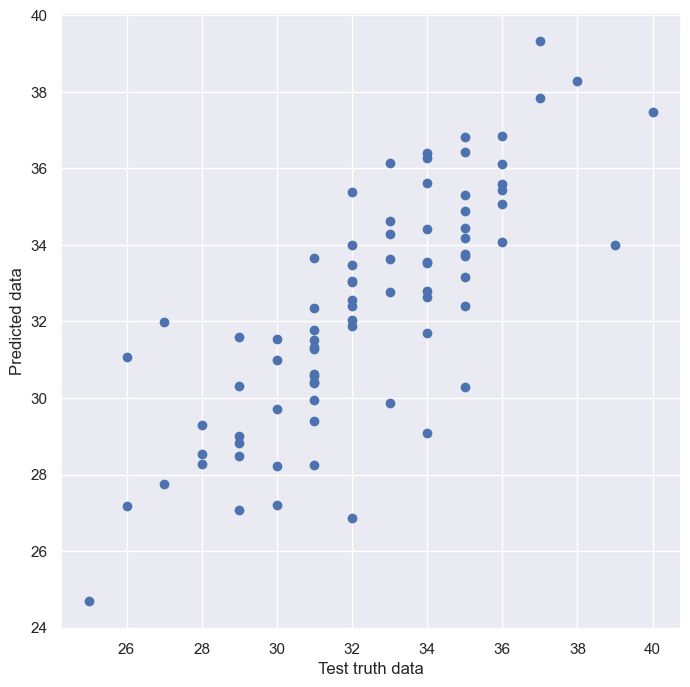

In [123]:
plt.scatter(x=y_test,y=ridge_reg_pred)
plt.xlabel("Test truth data")
plt.ylabel("Predicted data")

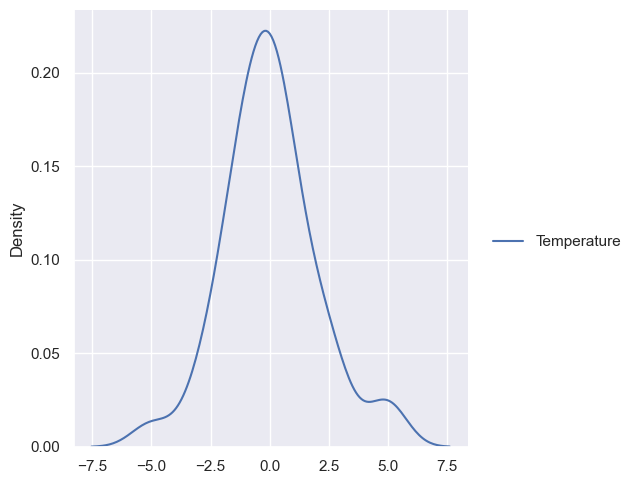

In [124]:
#2. Residual should be normally distributed
sns.displot(data = residual_ridge_reg, kind='kde')

Text(0, 0.5, 'Residuals')

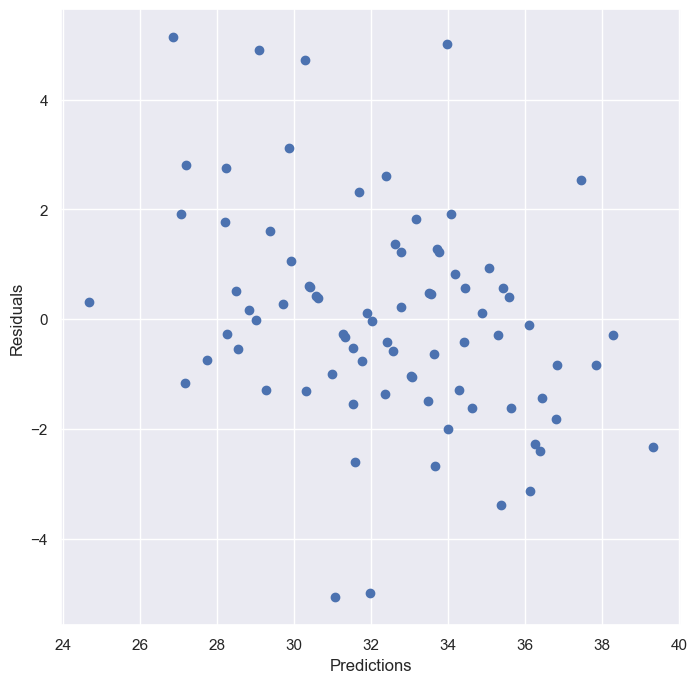

In [125]:
#3. Residual and Predicted values should follow uniform distribution
plt.scatter(x=ridge_reg_pred, y=residual_ridge_reg)
plt.xlabel('Predictions')
plt.ylabel('Residuals')

In [126]:
#9.2 Cost Function Values
print(f"MSE : {round(mean_squared_error(y_test, ridge_reg_pred),2)}\nMAE :{round(mean_absolute_error(y_test, ridge_reg_pred),2)}\nRMSE : {round(np.sqrt(mean_squared_error(y_test, ridge_reg_pred)),2)}")

MSE : 3.84
MAE :1.46
RMSE : 1.96


In [127]:
#10 Performance Metrics
ridge_reg_r2_score=r2_score(y_test, ridge_reg_pred)
ridge_reg_adj_r2_score=1-((1-ridge_reg_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print(f"R-Squared Accuracy : {round(ridge_reg_r2_score*100,3)} % \nAdjusted R-Squared Accuracy : {round(ridge_reg_adj_r2_score*100,2)}%")

R-Squared Accuracy : 58.087 % 
Adjusted R-Squared Accuracy : 51.31%


In [128]:
#11 Lasso Regression Model
## creating Lasso regression model
lasso_reg=Lasso()
lasso_reg

Lasso()

In [129]:
## Passing training data(X and y) to the model
lasso_reg.fit(X_train, y_train)

Lasso()

In [130]:
### Printing co-efficients and intercept of best fit hyperplane
print("1. Co-efficients of independent features is {}".format(lasso_reg.coef_)) 
print("2. Intercept of best fit hyper plane is {}".format(lasso_reg.intercept_))

1. Co-efficients of independent features is [-1.08509515 -0.          0.          0.          0.143232    0.
  0.          0.25277458  0.0645581   0.          0.56175689]
2. Intercept of best fit hyper plane is [32.1552795]


In [131]:
lasso_reg_pred=lasso_reg.predict(X_test)

In [132]:
y_test = y_test.squeeze()
residual_lasso_reg = y_test-lasso_reg_pred
residual_lasso_reg = pd.DataFrame(residual_lasso_reg)

In [133]:
#11.1 Validation of Lasso Regression assumptions
#1. Linear Relationship

Text(0, 0.5, 'Predicted data')

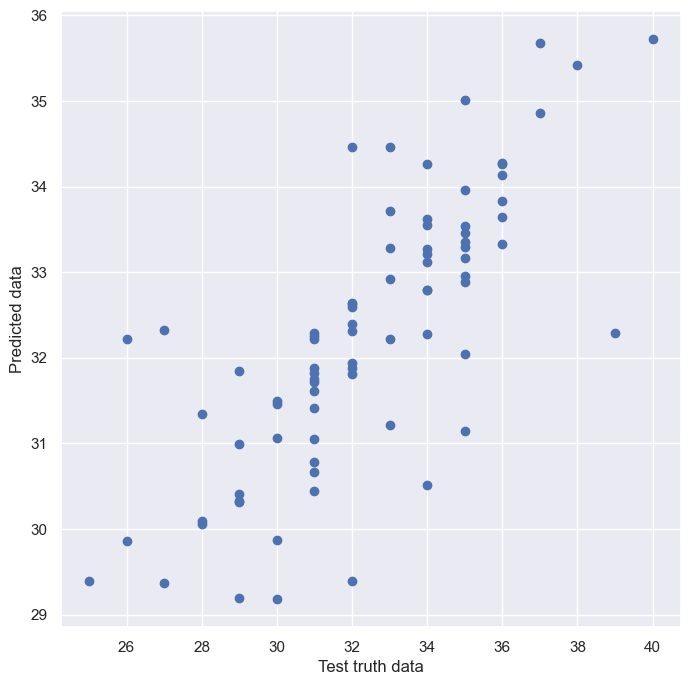

In [134]:
plt.scatter(x=y_test,y=lasso_reg_pred)
plt.xlabel("Test truth data")
plt.ylabel("Predicted data")

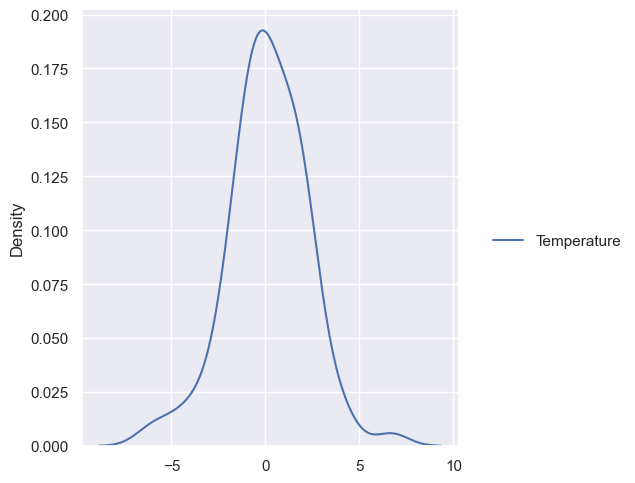

In [135]:
#2. Residual should be normally distributed
sns.displot( data = residual_lasso_reg, kind='kde')

Text(0, 0.5, 'Residuals')

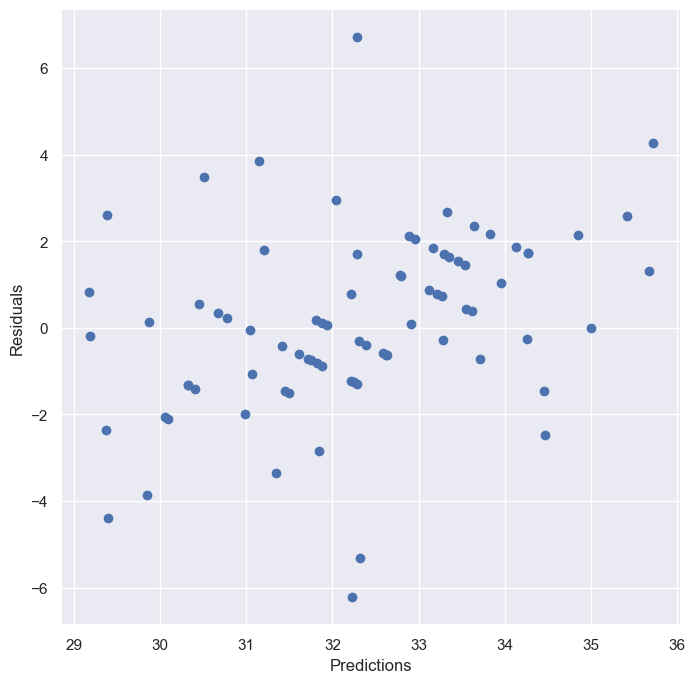

In [136]:
#3. Residual and Predicted values should follow uniform distribution
plt.scatter(x=lasso_reg_pred, y=residual_lasso_reg)
plt.xlabel('Predictions')
plt.ylabel('Residuals')

In [137]:
#11.2 Cost Function Values
print(f"MSE : {round(mean_squared_error(y_test, lasso_reg_pred),2)}\nMAE :{round(mean_absolute_error(y_test, lasso_reg_pred),2)}\nRMSE : {round(np.sqrt(mean_squared_error(y_test, lasso_reg_pred)),2)}")

MSE : 4.38
MAE :1.59
RMSE : 2.09


In [138]:
#11.3 Performance Metrics
lasso_reg_r2_score=r2_score(y_test, lasso_reg_pred)
lasso_reg_adj_r2_score=1-((1-lasso_reg_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print(f"R-Squared Accuracy : {round(lasso_reg_r2_score*100,3)} % \nAdjusted R-Squared Accuracy : {round(lasso_reg_adj_r2_score*100,2)}%")

R-Squared Accuracy : 52.257 % 
Adjusted R-Squared Accuracy : 44.53%


In [140]:
#12 Elastic Net Regression Model
## creating Elastic-Net regression model
elastic_reg=ElasticNet()
elastic_reg

ElasticNet()

In [141]:
### Passing training data(X and y) to the model
elastic_reg.fit(X_train, y_train)

ElasticNet()

In [142]:
### Printing co-efficients and intercept of best fit hyperplane
print("1. Co-efficients of independent features is {}".format(elastic_reg.coef_))
print("2. Intercept of best fit hyper plane is {}".format(elastic_reg.intercept_))

1. Co-efficients of independent features is [-0.79546519 -0.20624481  0.          0.09739707  0.29307131  0.28162536
  0.          0.25967031  0.19497905  0.          0.61917283]
2. Intercept of best fit hyper plane is [32.1552795]


In [143]:
elastic_reg_pred=elastic_reg.predict(X_test)

In [144]:
residual_elastic_reg=y_test-elastic_reg_pred
residual_elastic_reg = pd.DataFrame(residual_elastic_reg)

Text(0, 0.5, 'Predicted data')

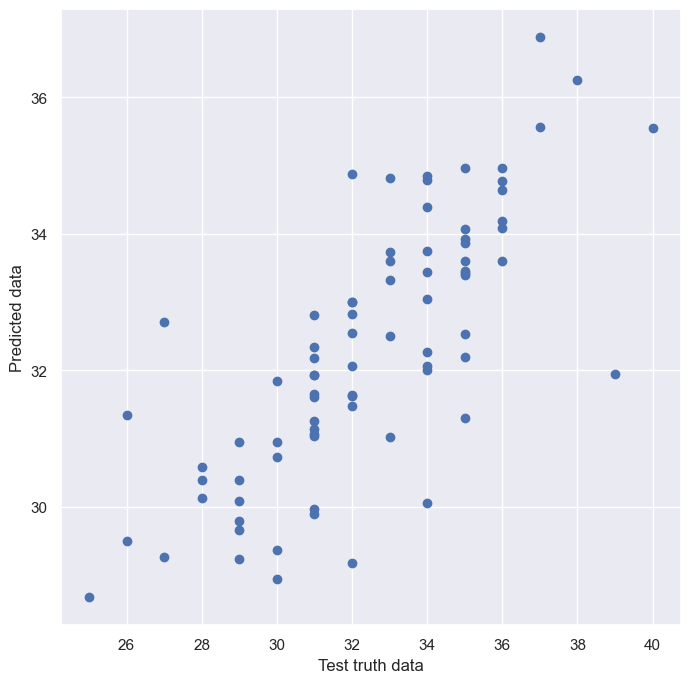

In [145]:
#12.1 Validation of Elastic Regression assumptions
#1. Linear Relationship
plt.scatter(x=y_test,y=elastic_reg_pred)
plt.xlabel("Test truth data")
plt.ylabel("Predicted data")

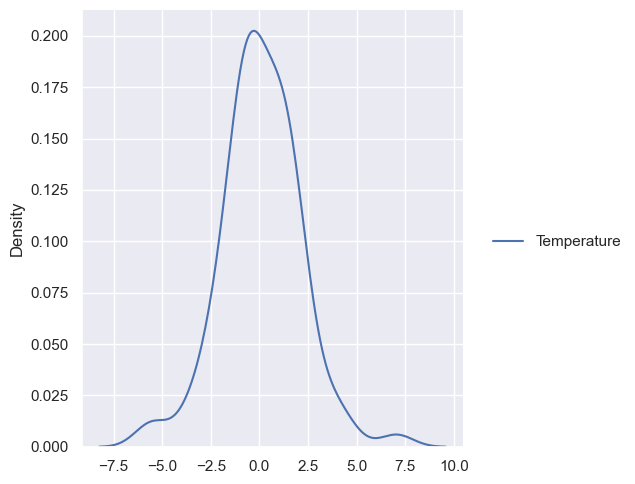

In [146]:
#2. Residual should be normally distributed
sns.displot( data = residual_elastic_reg, kind='kde')

Text(0, 0.5, 'Residuals')

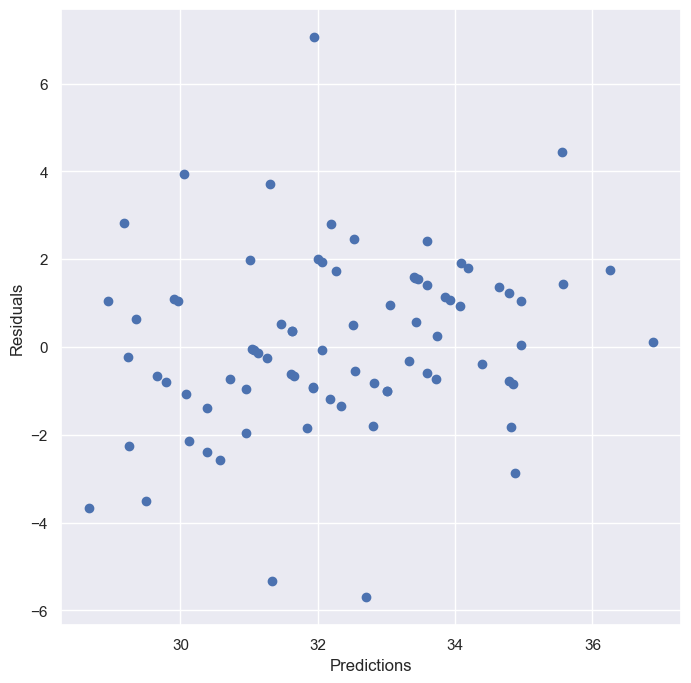

In [147]:
#3. Residual and Predicted values should follow uniform distribution
plt.scatter(x=elastic_reg_pred, y=residual_elastic_reg)
plt.xlabel('Predictions')
plt.ylabel('Residuals')

In [149]:
#12.2 Cost Function Values
print(f"MSE : {round(mean_squared_error(y_test, elastic_reg_pred),2)}\nMAE :{round(mean_absolute_error(y_test, elastic_reg_pred),2)}\nRMSE : {round(np.sqrt(mean_squared_error(y_test, elastic_reg_pred)),2)}")

MSE : 4.05
MAE :1.52
RMSE : 2.01


In [150]:
#12.3 Performance Metrics
elastic_reg_r2_score=r2_score(y_test, elastic_reg_pred)
elastic_reg_adj_r2_score=1-((1-elastic_reg_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print(f"R-Squared Accuracy : {round(elastic_reg_r2_score*100,3)} % \nAdjusted R-Squared Accuracy : {round(elastic_reg_adj_r2_score*100,2)}%")

R-Squared Accuracy : 55.813 % 
Adjusted R-Squared Accuracy : 48.67%


In [151]:
#13 Comparisions of all Models
#13.1 Cost Function Values

In [158]:
print(f"--------------------------------------")
print(f"MSE:\n1. Linear Regression : {round(mean_squared_error(y_test,linear_reg_pred),2)}\n2. Ridge Regression :{round(mean_squared_error(y_test, ridge_reg_pred),2)}\n3. Lasso Regression :{round(mean_squared_error(y_test, lasso_reg_pred),2)}\n4. Elastic Net Regression : {round(mean_squared_error(y_test, elastic_reg_pred),2)}")

print(f"---------------------------------------")
print(f"MAE:\n1. Linear Regression : {round(mean_absolute_error(y_test,linear_reg_pred),2)}\n2. Ridge Regression :{round(mean_absolute_error(y_test, ridge_reg_pred),2)}\n3. Lasso Regression :{round(mean_absolute_error(y_test, lasso_reg_pred),2)}\n4. Elastic Net Regression : {round(mean_absolute_error(y_test, elastic_reg_pred),2)}")

print(f"--------------------------------------")
print(f"RMSE:\n1. Linear Regression : {round(np.sqrt(mean_squared_error(y_test,linear_reg_pred)),2)}\n2. Ridge Regression : {round(np.sqrt(mean_squared_error(y_test, ridge_reg_pred)),2)}\n3. Lasso Regression :{round(np.sqrt(mean_squared_error(y_test, lasso_reg_pred)),2)}\n4. Elastic Net Regression : {round(np.sqrt(mean_squared_error(y_test,elastic_reg_pred)),2)}")
print(f"--------------------------------------")

--------------------------------------
MSE:
1. Linear Regression : 3.86
2. Ridge Regression :3.84
3. Lasso Regression :4.38
4. Elastic Net Regression : 4.05
---------------------------------------
MAE:
1. Linear Regression : 1.46
2. Ridge Regression :1.46
3. Lasso Regression :1.59
4. Elastic Net Regression : 1.52
--------------------------------------
RMSE:
1. Linear Regression : 1.96
2. Ridge Regression : 1.96
3. Lasso Regression :2.09
4. Elastic Net Regression : 2.01
--------------------------------------


In [ ]:
#13.2 Performance Metrics

In [160]:
print(f"--------------------------------------") 
print(f"R-Squared Accuracy:\n1. Linear Regression :{round(linear_reg_r2_score*100,3)} %\n2. Ridge Regression :{round(ridge_reg_r2_score*100,3)} %\n3. Lasso Regression :{round(lasso_reg_r2_score*100,3)} %\n4. Elastic Net Regression :{round(elastic_reg_r2_score*100,3)} %")

print(f"--------------------------------------") 
print(f"Adjusted R-Squared Accuracy:\n1. Linear Regression :{round(linear_reg_adj_r2_score*100,3)} %\n2. Ridge Regression :{round(ridge_reg_adj_r2_score*100,3)} %\n3. Lasso Regression :{round(lasso_reg_adj_r2_score*100,3)} %\n4. Elastic Net Regression :{round(elastic_reg_adj_r2_score*100,3)} %")
print(f"--------------------------------------")




--------------------------------------
R-Squared Accuracy:
1. Linear Regression :57.923 %
2. Ridge Regression :58.087 %
3. Lasso Regression :52.257 %
4. Elastic Net Regression :55.813 %
--------------------------------------
Adjusted R-Squared Accuracy:
1. Linear Regression :51.116 %
2. Ridge Regression :51.307 %
3. Lasso Regression :44.534 %
4. Elastic Net Regression :48.665 %
--------------------------------------
